### get_stations

In [6]:
from client import Client
client = Client('TAPS')
from obspy import UTCDateTime
starttime = UTCDateTime("2008-01-01")
endtime = UTCDateTime("2008-12-31")
inv = client.get_stations(network="TW", station="NSE*",starttime=starttime,endtime=endtime, level="response")
print(inv)

Inventory created at 2021-08-02T07:18:10.000000Z
	Created by: TECDC WEB SERVICE
		    /fdsnws/station/0/query?starttime=2008-01-01T00:00:00.000000&endtim...
	Sending institution: TECDC (TECDC)
	Contains:
		Networks (1):
			TW
		Stations (27):
			TW.NSE01 (E.Taiwan Range, NSE01)
			TW.NSE02 (E.Taiwan Range, NSE02)
			TW.NSE03 (E.Taiwan Range, NSE03)
			TW.NSE04 (E.Taiwan Range, NSE04)
			TW.NSE05 (E.Taiwan Range, NSE05)
			TW.NSE06 (E.Taiwan Range, NSE06)
			TW.NSE07 (E.Taiwan Range, NSE07)
			TW.NSE08 (E.Taiwan Range, NSE08)
			TW.NSE09 (E.Taiwan Range, NSE09)
			TW.NSE10 (E.Taiwan Range, NSE10)
			TW.NSE11 (E.Taiwan Range, NSE11)
			TW.NSE12 (E.Taiwan Range, NSE12)
			TW.NSE13 (E.Taiwan Range, NSE13)
			TW.NSE14 (E.Taiwan Range, NSE14)
			TW.NSE15 (E.Taiwan Range, NSE15)
			TW.NSE16 (E.Taiwan Range, NSE16)
			TW.NSE17 (E.Taiwan Range, NSE17)
			TW.NSE18 (E.Taiwan Range, NSE18)
			TW.NSE19 (E.Taiwan Range, NSE19)
			TW.NSE20 (E.Taiwan Range, NSE20)
			TW.NSE21 (E.Taiwan Range, NSE21)
	

### get_waveforms

3 Trace(s) in Stream:
TW.NSE01..EHE | 2008-04-16T00:00:00.000000Z - 2008-04-16T00:59:59.990000Z | 100.0 Hz, 360000 samples
TW.NSE01..EHN | 2008-04-16T00:00:00.000000Z - 2008-04-16T00:59:59.990000Z | 100.0 Hz, 360000 samples
TW.NSE01..EHZ | 2008-04-16T00:00:00.000000Z - 2008-04-16T00:59:59.990000Z | 100.0 Hz, 360000 samples


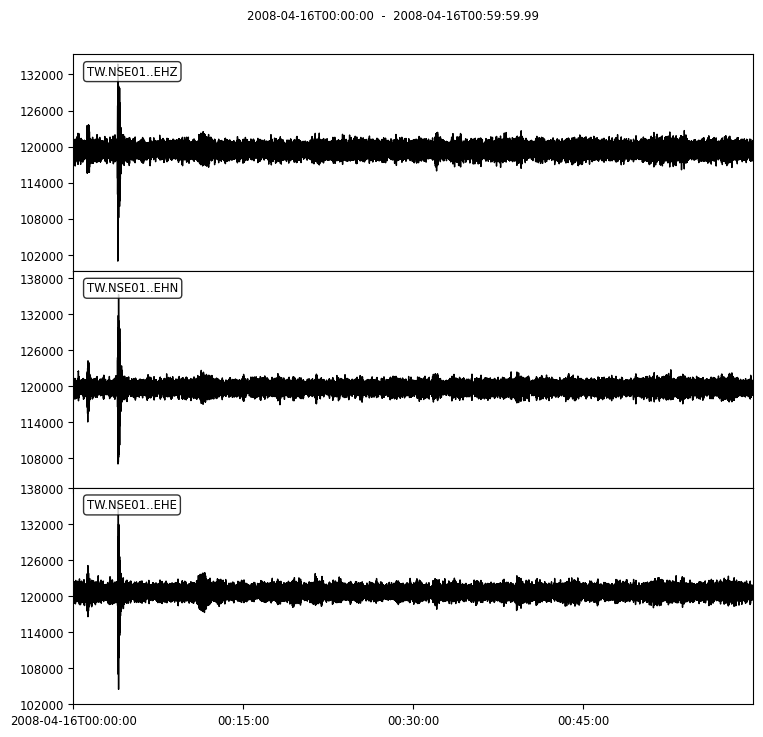

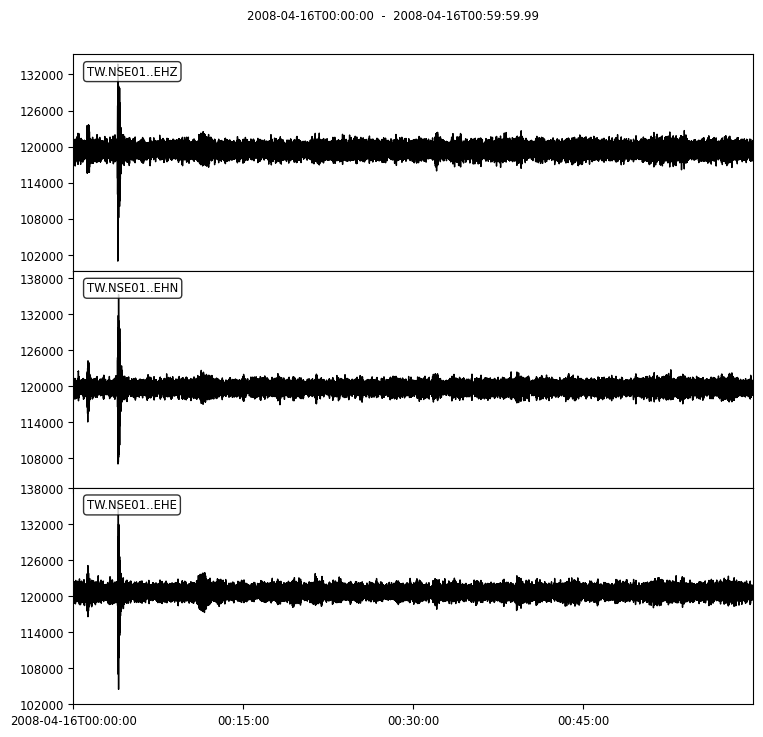

In [7]:
from client import Client
client = Client('TAPS')
user = 'user'
password = 'password'
client.set_credentials(user, password)
from obspy import UTCDateTime
t = UTCDateTime("2008-04-16T00:00:00.000")
st = client.get_waveforms("TW", "NSE01", "--", "*", t, t + 60 * 60)
print(st)
st.plot()

### remove_response

TW.NSE01..EHE | 2008-04-16T00:00:00.000000Z - 2008-04-16T00:59:59.990000Z | 100.0 Hz, 360000 samples

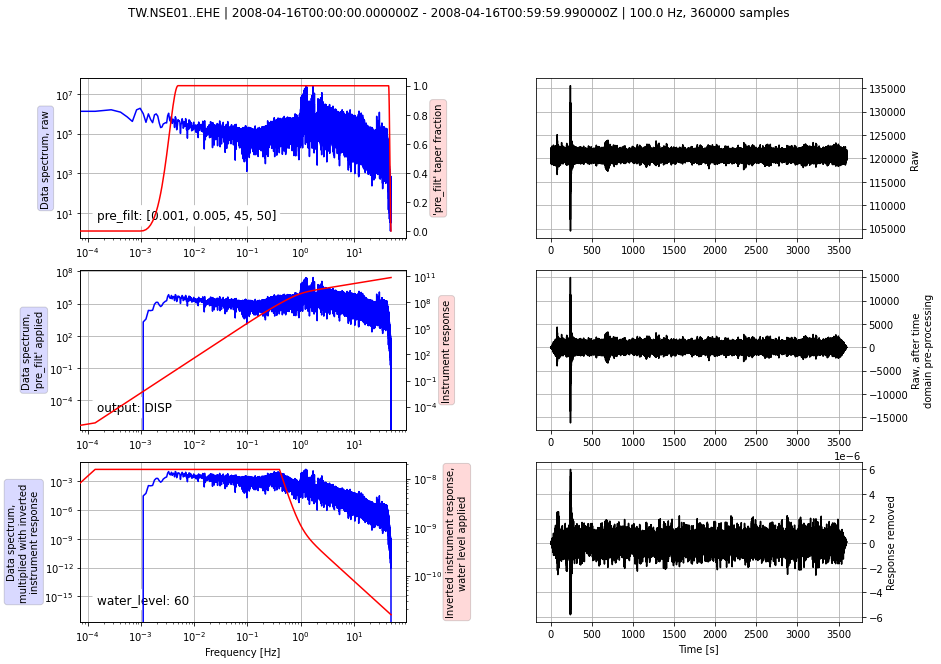

In [8]:
tr = st[0]
pre_filt = [0.001, 0.005, 45, 50]
tr.remove_response(inventory=inv, pre_filt=pre_filt, output="DISP",
                   water_level=60, plot=True)